# Luiz Felipe Galvão Rangel

## Exercício 1

In [1]:
import numpy as np
def calculate (list):
    if len(list) != 9:
        raise ValueError('List must contain nine numbers.')
        
    matrix = np.array(list).reshape(3,3)
    calculations ={
    'mean': [
        matrix.mean(axis=0).tolist(),matrix.mean(axis=1).tolist(),matrix.mean().tolist()
    ],
    'variance':[
        matrix.var(axis=0).tolist(),matrix.var(axis=1).tolist(),matrix.var().tolist()
    ],
    'standard deviation':[
        matrix.std(axis=0).tolist(),matrix.std(axis=1).tolist(),matrix.std().tolist()
    ],
    'max':[
        matrix.max(axis=0).tolist(),matrix.max(axis=1).tolist(),matrix.max().tolist()
    ],
    'min':[
        matrix.min(axis=0).tolist(),matrix.min(axis=1).tolist(),matrix.min().tolist()
    ],
    'sum':[
        matrix.sum(axis=0).tolist(),matrix.sum(axis=1).tolist(),matrix.sum().tolist()
    ]
    }
    return calculations

print(calculate([0, 1, 2, 3, 4, 5, 6, 7, 8]))

{'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0], 'variance': [[6.0, 6.0, 6.0], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], 6.666666666666667], 'standard deviation': [[2.449489742783178, 2.449489742783178, 2.449489742783178], [0.816496580927726, 0.816496580927726, 0.816496580927726], 2.581988897471611], 'max': [[6, 7, 8], [2, 5, 8], 8], 'min': [[0, 1, 2], [0, 3, 6], 0], 'sum': [[9, 12, 15], [3, 12, 21], 36]}


## Exercício 2

In [2]:
import pandas as pd

def calculate_demographic_data(print_data=True):
    # Read data from file
    df=pd.read_csv('adult.data.csv')

    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df['race'].value_counts()

    # What is the average age of men?
    average_age_men = df['age'][df['sex'] == 'Male'].mean().round(1)

    # What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = (((df['education'] == 'Bachelors').sum()/df.shape[0])*100).round(1)

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?
    h_education = ['Bachelors', 'Masters', 'Doctorate']
    filtered_df = df[df['education'].isin(h_education)]
    filtered_df2 = df[~df['education'].isin(h_education)]

    # with and without `Bachelors`, `Masters`, or `Doctorate`
    lenHeducation=((filtered_df.shape[0]/df.shape[0])*100)
    lenNeducation=((filtered_df2.shape[0]/df.shape[0])*100)
    higher_education = round(lenHeducation,1) 
    lower_education = round(lenNeducation,1)

    # percentage with salary >50K
    higher_education_rich = (((filtered_df['salary'] == '>50K').sum()/(filtered_df.shape[0]))*100).round(1)
    lower_education_rich = (((filtered_df2['salary'] == '>50K').sum()/(filtered_df2.shape[0]))*100).round(1)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df['hours-per-week'].min()
    
    min_df=df[df['hours-per-week'] == 1]
    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = min_df.shape[0]

    rich_percentage = (((min_df['salary'] == '>50K').sum()/(min_df.shape[0]))*100).round(1)

    # What country has the highest percentage of people that earn >50K?
    high_salary_df = df[df['salary'] == '>50K']
    country_counts = df['native-country'].value_counts()
    high_earning_country_counts = high_salary_df['native-country'].value_counts()
    
    highest_earning_country_percentage_series = (high_earning_country_counts / country_counts * 100).astype(float)
    highest_earning_country = highest_earning_country_percentage_series.idxmax()
    highest_earning_country_percentage = round(highest_earning_country_percentage_series.max(), 1)

    # Identify the most popular occupation for those who earn >50K in India.
    india_df=df[df['native-country'] == 'India']
    high_income_india_df = india_df[india_df['salary'] == '>50K']
    top_IN_occupation = high_income_india_df['occupation'].value_counts().idxmax()

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print("Number of each race:\n", race_count) 
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

calculate_demographic_data()

Number of each race:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
Average age of men: 39.4
Percentage with Bachelors degrees: 16.4%
Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%
Top occupations in India: Prof-specialty


## Exercício 3

C:\Users\300929\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

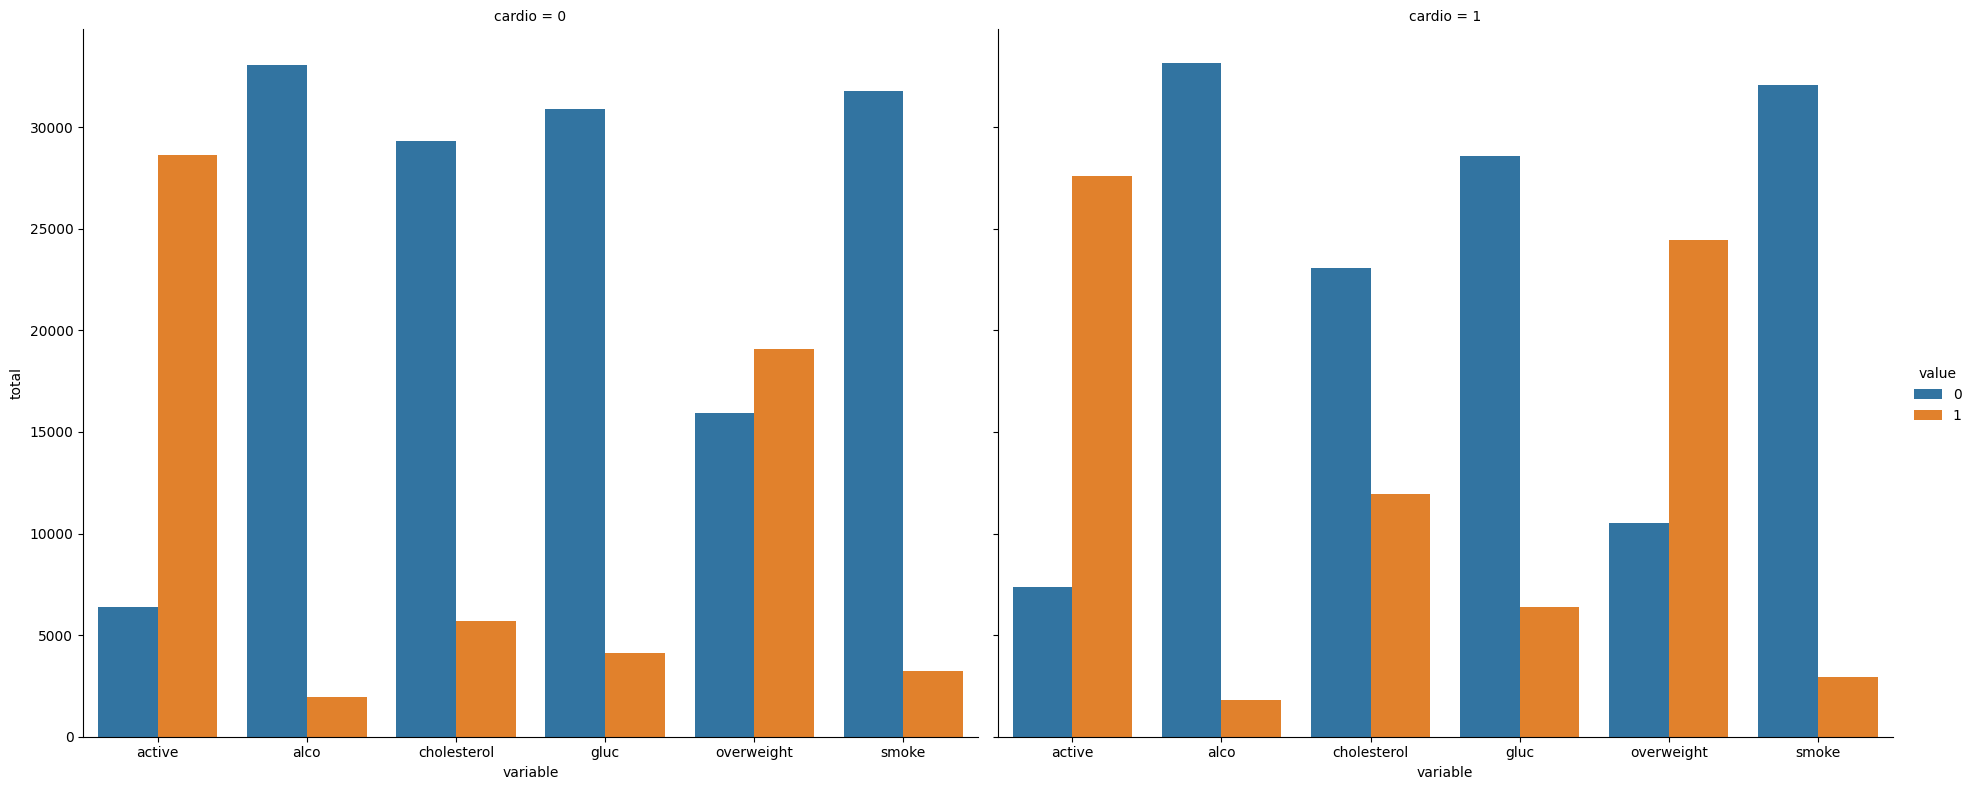

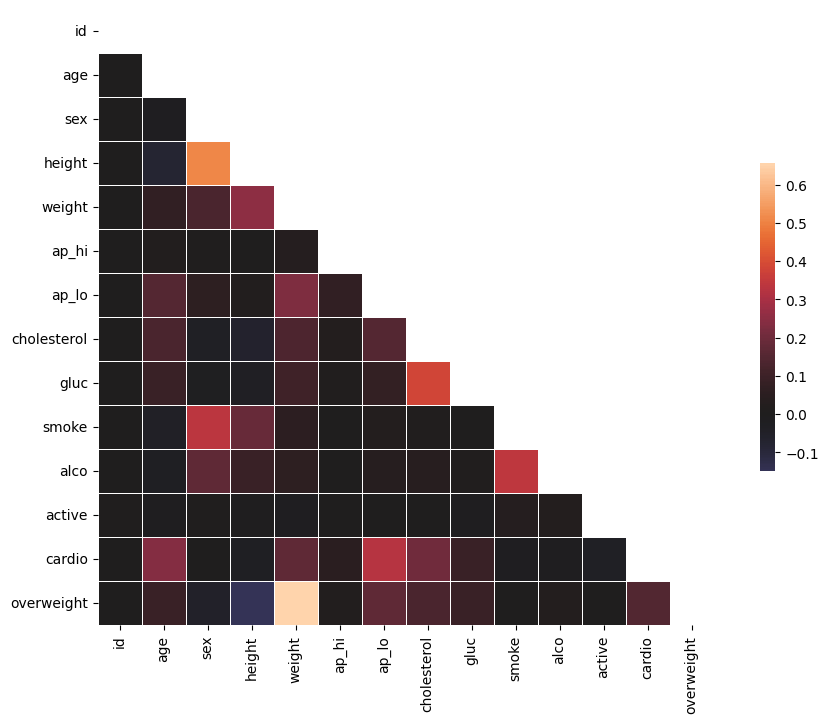

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')

# 2
df['BMI'] = df['weight'] / (np.power((df['height'] / 100), 2))
df['overweight'] = np.where(df['BMI'] > 25,1,0)

# 3
df['cholesterol'] = np.where(df['cholesterol'] == 1,0,1)
df['cholesterol'].value_counts()
df['gluc'] = np.where(df['gluc'] == 1,0,1)
df['gluc'].value_counts()
# 4
def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    fig = sns.catplot(x='variable', y='total', col='cardio', hue='value', data=df_cat, kind='bar', height=8, aspect=1.2)
    fig.set_axis_labels("variable", "total")


    return fig

# 5
def draw_heat_map():
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ].drop(columns=['BMI'])

    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(12, 8))
    fig = sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, ax=ax)

    return fig

draw_cat_plot()
draw_heat_map()

## Exercício 4

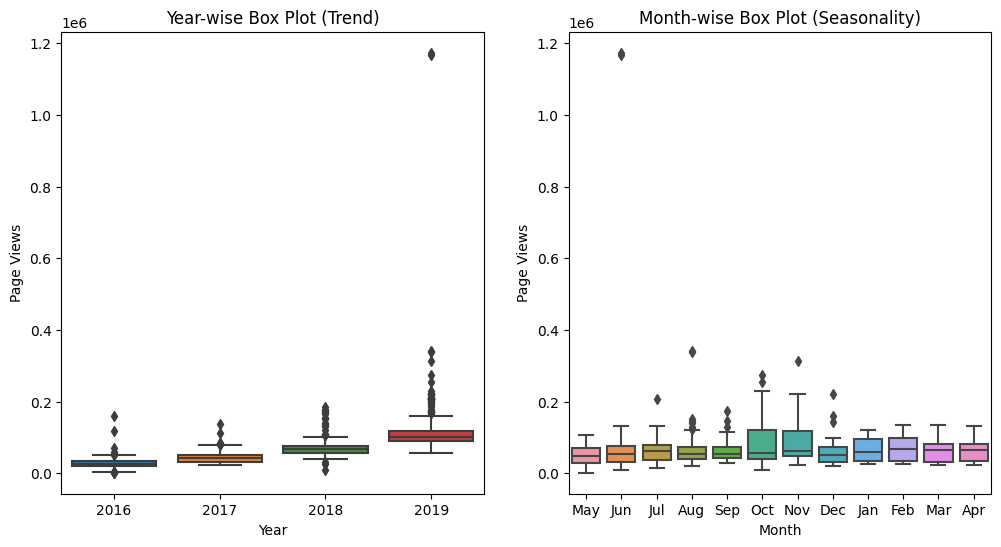

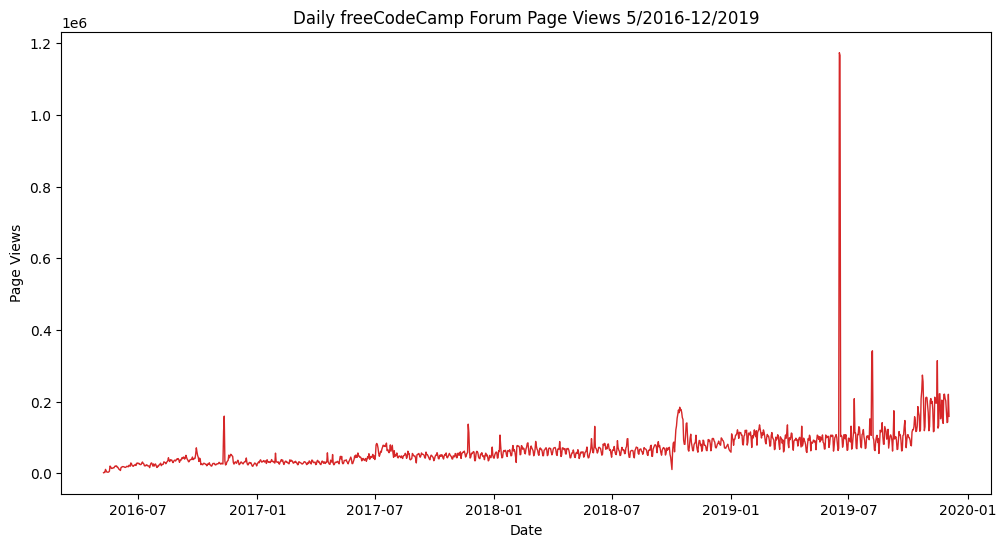

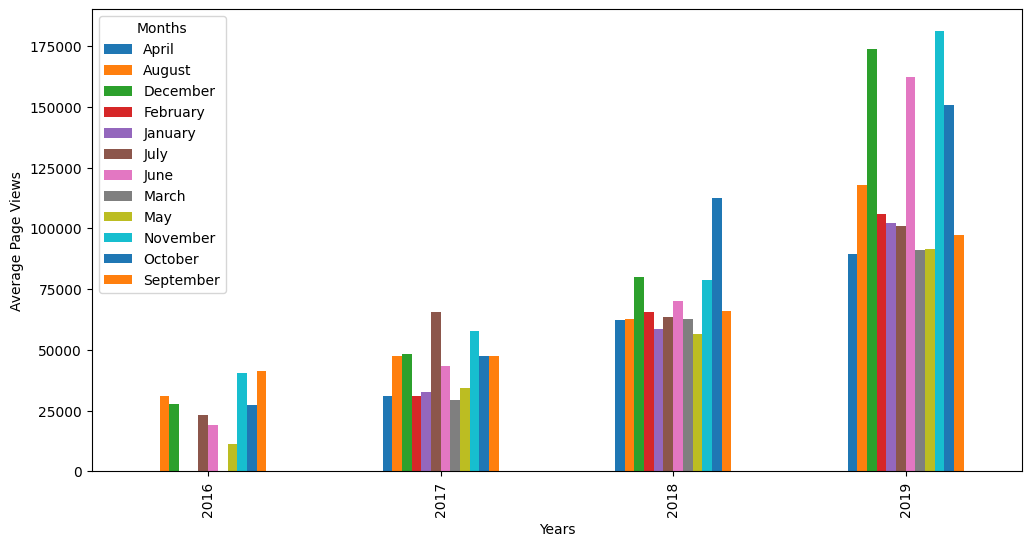

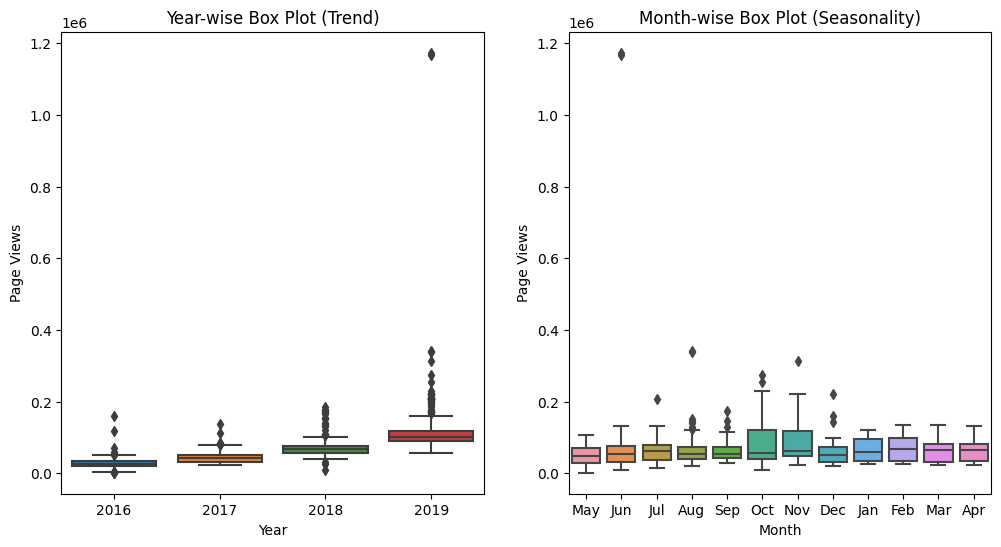

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'],index_col='date')

# Clean data
df1 = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] >= df['value'].quantile(0.975))
]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'],color = 'tab:red',linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar=df.copy()
    df_bar['year']=df_bar.index.year
    df_bar['month']=df_bar.index.month_name()
    df_bar = df_bar.groupby(['year','month'])['value'].mean().unstack()
    # Draw bar plot
    fig=df_bar.plot(kind='bar', figsize=(12,6), legend=True).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')

    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    fig, axes = plt.subplots(1, 2, figsize=(12,6)) 
    sns.boxplot(x='year',y='value',data=df_box,ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month',y='value',data=df_box,ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    return fig

draw_line_plot()
draw_bar_plot()
draw_box_plot()

## Exercício 5

In [6]:
from scipy.stats import linregress

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

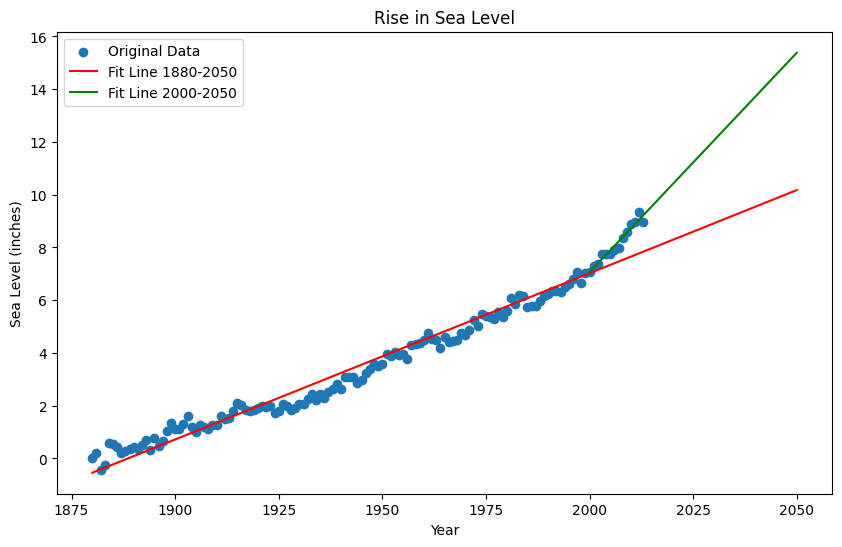

In [7]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Original Data')

    # Create first line of best fit
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    years_ext = pd.Series(range(1880, 2051))
    plt.plot(years_ext, intercept + slope*years_ext, 'r', label='Fit Line 1880-2050')

    # Create second line of best fit
    recent_df = df[df['Year'] >= 2000]
    recent_slope, recent_intercept, recent_r_value, recent_p_value, recent_std_err = linregress(recent_df['Year'], recent_df['CSIRO Adjusted Sea Level'])
    recent_years_ext = pd.Series(range(2000, 2051))
    plt.plot(recent_years_ext, recent_intercept + recent_slope*recent_years_ext, 'g', label='Fit Line 2000-2050')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()

    return plt.gca()

# Call the function to generate and save the plot
draw_plot()